# Feed forward (3x2)
* check the value of linear model

In [2]:
import tensorflow as tf

W = tf.Variable([[.1, .2, .3], [.2, .4, .6]], dtype=tf.float32)
b = tf.Variable([[.2], [.3]], dtype=tf.float32)
x = tf.placeholder(tf.float32)

linear_model = W*x + b

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(linear_model, {x: [1., 2., 3.]}))


[[0.3       0.6       1.1      ]
 [0.5       1.1       2.1000001]]


* check the value of reduce

In [3]:
summary = tf.reduce_sum(linear_model)
print(sess.run(summary, {x: [1., 2., 3.]}))

summary_1 = tf.reduce_sum(linear_model, 1)
print(sess.run(summary_1, {x: [1., 2., 3.]}))

5.7
[2.        3.7000003]


* check the value of sigmod

In [4]:
sig = tf.nn.sigmoid(summary_1)
print(sess.run(sig, {x: [1., 2., 3.]}))

[0.880797 0.975873]


# print loss with optimizer

In [7]:
# will put y_train = [0., 1.] into placeholder y
y = tf.placeholder(tf.float32)

err = tf.square(sig - y)
loss = tf.reduce_sum(err)

x_train = [1., 2., 3.]
y_train = [0., 1.]

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(3):
    curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
    print("W:\n%s\nb:\n%s\nloss: %s"%(curr_W, curr_b, curr_loss))

W:
[[0.1 0.2 0.3]
 [0.2 0.4 0.6]]
b:
[[0.2]
 [0.3]]
loss: 0.7763855
W:
[[0.1 0.2 0.3]
 [0.2 0.4 0.6]]
b:
[[0.2]
 [0.3]]
loss: 0.7763855
W:
[[0.1 0.2 0.3]
 [0.2 0.4 0.6]]
b:
[[0.2]
 [0.3]]
loss: 0.7763855


# loss with optimizer

In [10]:
# build-in optimizer
optimizer = tf.train.GradientDescentOptimizer(0.03)
train = optimizer.minimize(loss)

show_step = 3
losses = []
for i in range(16):
    sess.run(train, {x: x_train, y: y_train})
    curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
    curr_Sig, curr_y, curr_err = sess.run([sig, y, err], {x: x_train, y: y_train})
    
    if i % 3 == 0:
        print("W:\n%s\nb:\n%s\nloss: %s"%(curr_W, curr_b, curr_loss))
        print("Sig: %s\ny: %s\nerr: %s"%(curr_Sig, curr_y, curr_err))
        
    losses.append(curr_loss)

W:
[[0.04451909 0.08903817 0.13355726]
 [0.20025998 0.40051997 0.60077995]]
b:
[[0.03355726]
 [0.30077994]]
loss: 0.45414236
Sig: [0.67347383 0.9760133 ]
y: [0. 1.]
err: [0.453567   0.00057536]
W:
[[0.01836967 0.03673934 0.05510902]
 [0.20036091 0.40072182 0.60108274]]
b:
[[-0.04489098]
 [ 0.30108276]]
loss: 0.2820957
Sig: [0.5305874 0.9760677]
y: [0. 1.]
err: [0.28152296 0.00057275]
W:
[[-0.0033956  -0.00679119 -0.01018678]
 [ 0.20046139  0.40092278  0.60138416]]
b:
[[-0.11018679]
 [ 0.30138424]]
loss: 0.16588198
Sig: [0.40658554 0.97612154]
y: [0. 1.]
err: [0.1653118  0.00057018]
W:
[[-0.01925026 -0.03850051 -0.05775075]
 [ 0.20056142  0.40112284  0.6016843 ]]
b:
[[-0.15775077]
 [ 0.30168438]]
loss: 0.10451054
Sig: [0.3224018 0.9761752]
y: [0. 1.]
err: [0.10394292 0.00056762]
W:
[[-0.03074025 -0.0614805  -0.09222075]
 [ 0.20066102  0.40132204  0.601983  ]]
b:
[[-0.19222076]
 [ 0.30198318]]
loss: 0.07215469
Sig: [0.26756233 0.97622836]
y: [0. 1.]
err: [0.0715896  0.00056509]
W:
[[-0.0

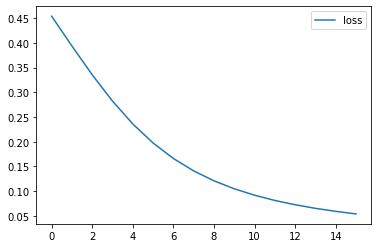

In [12]:
import matplotlib.pyplot as plt
plt.plot(list(range(0, 16)), losses, label='loss')
plt.legend()
plt.show()